<a href="https://colab.research.google.com/github/Narendra13512u/Analysis-of-Draught-Monitoring-System/blob/main/P_title_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

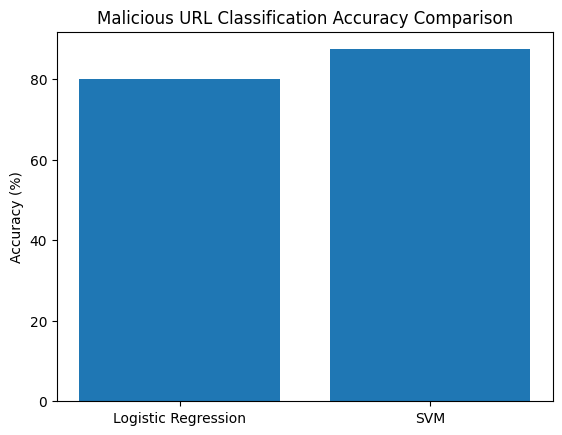

Logistic Regression Accuracy: 80.00%
SVM Accuracy: 87.41%


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv("/content/dataset.csv")

# Split the dataset into features (X) and labels (y)
X = data['url']
y = data['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert URL strings to TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Logistic Regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_tfidf, y_train)

# Train an SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

# Predict with both models
logistic_regression_predictions = logistic_regression_model.predict(X_test_tfidf)
svm_predictions = svm_model.predict(X_test_tfidf)

# Calculate accuracies
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_predictions) * 100
svm_accuracy = accuracy_score(y_test, svm_predictions) * 100

# Plot a bar chart to compare accuracies
methods = ['Logistic Regression', 'SVM']
accuracies = [logistic_regression_accuracy, svm_accuracy]

plt.bar(methods, accuracies)
plt.ylabel('Accuracy (%)')
plt.title('Malicious URL Classification Accuracy Comparison')
plt.show()

print(f"Logistic Regression Accuracy: {logistic_regression_accuracy:.2f}%")
print(f"SVM Accuracy: {svm_accuracy:.2f}%")